In [1]:
# import initial dependencies
import pandas as pd
import requests
import json
from pprint import pprint
from api_key import omdb_key


In [2]:
# create a path to academy awards csv and read it into a pandas dataframe
awards_csv = "academy_awards_data_2.csv"
awards_df = pd.read_csv(awards_csv, usecols = ['Nominee', 'Year', 'Category', 'Won?'], encoding = 'latin-1')

# create another dataframe that only includes nominees in the Best Picture category
award_data = awards_df.loc[awards_df["Category"] == "Best Picture", :]

# create list of best picture nominees
best_picture_noms = award_data["Nominee"]

# print(best_picture_noms)
# print(best_picture_noms[77])
award_data.head()


,Year,Category,Nominee,Won?
75,2010 (83rd),Best Picture,Black Swan,NO
76,2010 (83rd),Best Picture,The Fighter,NO
77,2010 (83rd),Best Picture,Inception,NO
78,2010 (83rd),Best Picture,The Kids Are All Right,NO
79,2010 (83rd),Best Picture,The King's Speech,YES


In [ ]:
# NO NEED TO RUN THIS CELL AGAIN BECAUSE DATA IS ALREADY READ INTO CSV BELOW, 
# BUT TOTALLY FEEL FREE TO TEST IF YOU'VE INCLUDED ADDITIONAL/DIFFERENT AWARD CATEGORIES

# print the corresponding number for each movie  
movie_number = 1

# empty lists for holding movie data
box_office = []
genre = []
meta_score = []
imdb_rating = []
title = []
poster_url = []
rated = []
release_date = []
studio = []

best_picture_noms = award_data["Nominee"]
base_url = "http://www.omdbapi.com/?"

    
# print statement as each movie is processed
print(f"Beginning Data Retrieval")
print(f"==============================")

# loop through the movies in the best picture noms dataframe 
for movie in best_picture_noms:
    
    params = {
    "apikey" : omdb_key,
    "t" : movie
    } 
    
    # try statement for each potential movie
    try: 
        omdb_data_raw = requests.get(base_url, params=params)
        omdb_data = omdb_data_raw.json()
        box_office.append(omdb_data["BoxOffice"])
        genre.append(omdb_data["Genre"])
        meta_score.append(omdb_data["Metascore"])
        imdb_rating.append(omdb_data["imdbRating"])
        title.append(omdb_data["Title"])
        poster_url.append(omdb_data["Poster"])
        rated.append(omdb_data["Rated"]) 
        release_date.append(omdb_data["Released"]) 
        studio.append(omdb_data["Production"])
        print_title = omdb_data["Title"]
        
        print(f"Processing Record {movie_number} | {print_title}")
        print(omdb_data_raw.url) 
        
        # increase movie number by one each loop
        movie_number = movie_number + 1
        
#         to avoid 60 rpm api limit i'm waiting just over 1 second per loop
#         https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/)
        time.sleep(1.01)
        
    # skip if no movie is found or if data is missing
    except:
        print("Data missing or movie not found. Skipping...")
    continue
    
print(f"==============================")
print(f"Data Retrieval Complete")
print(f"==============================")

In [ ]:
# NO NEED TO RUN THIS CELL AGAIN BECAUSE DATA IS ALREADY READ INTO CSV BELOW, 
# BUT TOTALLY FEEL FREE TO TEST IF YOU'VE INCLUDED ADDITIONAL/DIFFERENT AWARD CATEGORIES

# converting filtered api data into dataframe
filtered_omdb_data_df= pd.DataFrame ({
    "Title": title,
    "Genre": genre,
    "Meta_Score": meta_score,
    "imdb_Rating": imdb_rating,
    "Box_Office" : box_office,
    "Rated" : rated,
    "Studio" : studio,
    "Release_Date" : release_date,
    "Poster_URL" : poster_url
})

# coverting dataframe into csv-- this step isn't necessary, but did it so i'm not constantly dealing with the api directly
filtered_omdb_data_df.to_csv('filtered_omdb_data.csv', index=False)
filtered_omdb_data_df.head()

In [3]:
# created a path to the filted api csv and read it into a pandas dataframe
filtered_omdb_csv = "filtered_omdb_data.csv"
filtered_omdb_csv_df = pd.read_csv(filtered_omdb_csv)
# filtered_omdb_csv_df.count()
# award_data.count()

# merged the filtered api data csv and awards data csv into a single dataset
merged_movie_data_df = pd.merge(filtered_omdb_csv_df, award_data, left_on="Title", right_on="Nominee")
# merged_movie_data_df.to_csv('merged_movie_data.csv', index=False)
merged_movie_data_df.head()

,Title,Genre,Meta_Score,imdb_Rating,Box_Office,Rated,Studio,Release_Date,Poster_URL,Year,Category,Nominee,Won?
0,Black Swan,"Drama, Thriller",79.0,8.0,"$106,952,327",R,Fox Searchlight,17 Dec 2010,https://m.media-amazon.com/images/M/MV5BNzY2Nz...,2010 (83rd),Best Picture,Black Swan,NO
1,The Fighter,"Biography, Drama, Sport",79.0,7.8,"$93,571,803",R,Paramount Pictures,17 Dec 2010,https://m.media-amazon.com/images/M/MV5BMTM0OD...,2010 (83rd),Best Picture,The Fighter,NO
2,Inception,"Action, Adventure, Sci-Fi, Thriller",74.0,8.8,"$292,568,851",PG-13,Warner Bros. Pictures,16 Jul 2010,https://m.media-amazon.com/images/M/MV5BMjAxMz...,2010 (83rd),Best Picture,Inception,NO
3,The Kids Are All Right,"Comedy, Drama, Romance",86.0,7.0,"$20,803,237",R,Focus Features,30 Jul 2010,https://m.media-amazon.com/images/M/MV5BMjE4NT...,2010 (83rd),Best Picture,The Kids Are All Right,NO
4,The King's Speech,"Biography, Drama, History",88.0,8.0,"$138,300,000",R,The Weinstein Company,25 Dec 2010,https://m.media-amazon.com/images/M/MV5BMzU5Mj...,2010 (83rd),Best Picture,The King's Speech,YES


In [4]:
# clean up Rated category.
merged_movie_data_df['Rated'] = merged_movie_data_df['Rated'].replace(
    {'NOT RATED': 'Not Rated', 'PASSED': 'Passed', 'UNRATED': 'Not Rated', 'Unrated': 'Not Rated', 'APPROVED': 'Approved'})

In [ ]:
# import depencies for charts

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# creating wordcloud (https://www.datacamp.com/community/tutorials/wordcloud-python)
word_cloud = WordCloud(max_font_size=75, max_words=100, background_color="white").generate(' '.join(merged_movie_data_df['Genre']))


# generate plot
plt.title("Pretty Cool Wordcloud")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
#create dataframe for winning and losing nominees
winning_noms = merged_movie_data_df[merged_movie_data_df["Won?"] == "YES"]
# winning_noms

losing_noms = merged_movie_data_df[merged_movie_data_df["Won?"] == "NO"]
# losing_noms

#calculate average score/rating
avg_meta_score = merged_movie_data_df["Meta_Score"].mean()
# print(avg_meta_score)

avg_imdb_rating = merged_movie_data_df["imdb_Rating"].mean()
# print(avg_imdb_rating)

In [ ]:
rated_as_index = merged_movie_data_df.set_index('Rated').groupby(['Rated'])
rated_as_index.head()


#breakdown the count of each rating
rated_breakdown = rated_as_index['Title'].count()
print(rated_breakdown)

rated_as_index.head()

In [ ]:
#create count of movie rating by winning and losing nominees 
rated_r = merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'R'].groupby('Won?')["Rated"].count()
rated_pg13 = merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'PG-13'].groupby('Won?')["Rated"].count()
rated_pg = merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'PG'].groupby('Won?')["Rated"].count()
rated_g= merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'G'].groupby('Won?')["Rated"].count()

rated_movies = pd.DataFrame({
        "Rated R": rated_r,
        "Rated PG-13": rated_pg13,
        "Rated PG": rated_pg,
        "Rated G": rated_g
})
rated_movies = rated_movies[['Rated R', 'Rated PG-13', 'Rated PG', 'Rated G']]
rated_movies.index.name = "Won?"

# rated_movies.head()

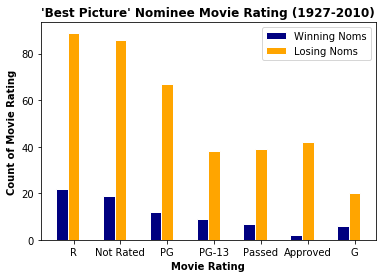

In [11]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
height_winning_rated = [22, 19, 12, 9, 7, 2, 6]
height_losing_rated = [89, 86, 67, 38, 39, 42, 20]

 
# Set position of bar on X axis
r1 = np.arange(len(height_winning_rated))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, height_winning_rated, color='navy', width=barWidth, edgecolor='white', label='Winning Noms')
plt.bar(r2, height_losing_rated, color='orange', width=barWidth, edgecolor='white', label='Losing Noms')
 
# Add xticks on the middle of the group bars
plt.title("'Best Picture' Nominee Movie Rating (1927-2010)", fontweight='bold')
plt.xlabel('Movie Rating', fontweight='bold')
plt.ylabel("Count of Movie Rating", fontweight='bold')

plt.xticks([r + barWidth for r in range(len(height_winning_rated))], ['R', 'Not Rated', 'PG', 'PG-13', 'Passed', 'Approved', 'G'])

#create legend, show graphic, and push to .png
plt.legend()
plt.savefig("count_of_rated_grouped.png")
plt.show()



In [ ]:
# #show labels on bar chart
# bars = plt.bar(bars_all_rated, height_all_rated, color='black', alpha=1, width=.7, align="center")
# plt.xticks(rotation=0)

# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + .15, yval + 2, yval)

In [5]:
# created a path to the filted api csv and read it into a pandas dataframe
seasons_omdb_csv = "Seasons_Movie_Data_2.csv"
seasons_omdb_csv_df = pd.read_csv(seasons_omdb_csv)
# seasons_omdb_csv_df.head()

# clean up Rated category.
seasons_omdb_csv_df['Rated'] = seasons_omdb_csv_df['Rated'].replace(
    {'NOT RATED': 'Not Rated', 'PASSED': 'Passed', 'UNRATED': 'Not Rated', 'Unrated': 'Not Rated', 'APPROVED': 'Approved'})

In [6]:
winter_noms = seasons_omdb_csv_df[seasons_omdb_csv_df["Seasons"] == "Winter"]
spring_noms = seasons_omdb_csv_df[seasons_omdb_csv_df["Seasons"] == "Spring"]
summer_noms = seasons_omdb_csv_df[seasons_omdb_csv_df["Seasons"] == "Summer"]
fall_noms = seasons_omdb_csv_df[seasons_omdb_csv_df["Seasons"] == "Fall"]

winter_rated = winter_noms['Rated'].value_counts()
# print(winter_rated)

spring_rated = spring_noms['Rated'].value_counts()
# print(spring_rated)

summer_rated = summer_noms['Rated'].value_counts()
# print(summer_rated)

fall_rated = fall_noms['Rated'].value_counts()
# print(fall_rated)

# rated_as_index_ = merged_movie_data_df.set_index('Rated').groupby(['Rated'])
# rated_as_index.head()

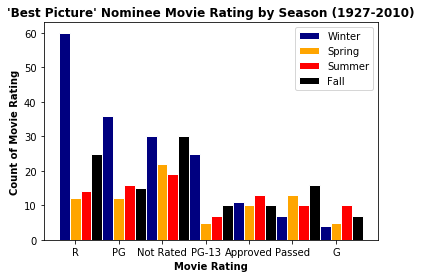

In [12]:
# libraries
import numpy as np
import matplotlib.pyplot as plt


# set width of bar
barWidth = 0.25

#r, pg, not rated, pg-13, approved, passed, g
# set height of bar
height_winter_rated = [60, 36, 30, 25, 11, 7, 4]
height_spring_rated = [12, 12, 22, 5, 10, 13, 5]
height_summer_rated = [14, 16, 19, 7, 13, 10, 10]
height_fall_rated = [25, 15, 30, 10, 10, 16, 7]

 
# Set position of bar on X axis
r1 = np.arange(len(height_winter_rated))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, height_winter_rated, color='navy', width=barWidth, edgecolor='white', label='Winter')
plt.bar(r2, height_spring_rated, color='orange', width=barWidth, edgecolor='white', label='Spring')
plt.bar(r3, height_summer_rated, color='red', width=barWidth, edgecolor='white', label='Summer')
plt.bar(r4, height_fall_rated, color='black', width=barWidth, edgecolor='white', label='Fall')

 
# Add xticks on the middle of the group bars
plt.title("'Best Picture' Nominee Movie Rating by Season (1927-2010)", fontweight='bold')
plt.xlabel('Movie Rating', fontweight='bold')
plt.ylabel("Count of Movie Rating", fontweight='bold')

plt.xticks([r + barWidth for r in range(len(height_winter_rated))], ['R', 'PG', 'Not Rated', 'PG-13', 'Approved', 'Passed', 'G'])

#create legend, show graphic, and push to .png
plt.legend()
plt.savefig("count_of_rated_by_season.png")
plt.show()